In [ ]:
import pandas as pd
import numpy as np
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
bibit = pd.read_csv('bibit_label.csv')
bibit[['content', 'score', 'label']].head()

,content,score,label
0,"Yth Bibit, pada hari senin tanggal 21 bulan ma...",5,1
1,"aplikasi ini menarik bangett, apalagi nominal ...",5,1
2,"Investasi jangka panjang selama 10 tahun, ujun...",5,1
3,"Gunakan refferal ""berlalu"" ya, biar kita sukse...",5,1
4,Awalnya bingung mau investasi apa.. terus seri...,5,1


In [ ]:
# case folding
bibit['content'] = bibit['content'].str.lower()

In [ ]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
bibit['content'] = bibit['content'].apply(remove_links)

# menghapus number 
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

bibit['content'] = bibit['content'].apply(remove_number)

# menghapus punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans("", "", string.punctuation))

bibit['content'] = bibit['content'].apply(remove_punctuation)

# menghapus single char
def remove_singl_char(text):
  return re.sub(r"\b[a-zA-Z]\b", " ", text)

bibit['content'] = bibit['content'].apply(remove_singl_char)


In [ ]:
# tokenize

def word_tokenize_wrapper(text):
    return word_tokenize(text)

bibit['content_tokenize'] = bibit['content'].apply(word_tokenize_wrapper)

In [ ]:
bibit['content_tokenize'].head()

0    [yth, bibit, pada, hari, senin, tanggal, bulan...
1    [aplikasi, ini, menarik, bangett, apalagi, nom...
2    [investasi, jangka, panjang, selama, tahun, uj...
3    [gunakan, refferal, berlalu, ya, biar, kita, s...
4    [awalnya, bingung, mau, investasi, apa, terus,...
Name: content_tokenize, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords_indonesia.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

bibit['content_tokens_WSW'] = bibit['content_tokenize'].apply(stopwords_removal) 


print(bibit['content_tokens_WSW'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0    [yth, bibit, senin, tanggal, maret, jam, wib, ...
1    [aplikasi, menarik, bangett, nominal, minimal,...
2    [investasi, jangka, ujung, ujungnya, pas, cair...
3    [refferal, sukses, perbedaan, negara, maju, ne...
4    [bingung, investasi, banget, liat, iklan, yout...
Name: content_tokens_WSW, dtype: object


In [ ]:
# normalized
normalized_word = pd.read_excel("normalisasi.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

bibit['content_normalized'] = bibit['content_tokens_WSW'].apply(normalized_term)

bibit['content_normalized'].head()

0    [yth, bibit, senin, tanggal, maret, jam, wib, ...
1    [aplikasi, menarik, bangett, nominal, minimal,...
2    [investasi, jangka, ujung, ujungnya, pas, cair...
3    [refferal, sukses, perbedaan, negara, maju, ne...
4    [bingung, investasi, banget, liat, iklan, yout...
Name: content_normalized, dtype: object

In [ ]:
pip install Sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 20.9 MB/s 


In [ ]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 25.4 MB/s 
     |████████████████████████████████| 281 kB 59.7 MB/s 
     |████████████████████████████████| 140 kB 59.9 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=ac0184fe2ca68981a350579006d43a012f0a83340061bd7144caee3aeab0ab97
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
# stemming

# import Sastrawi package

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in bibit['content_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

bibit['content_stemmed'] = bibit['content_normalized'].swifter.apply(get_stemmed_term)

print(bibit['content_stemmed'])

Output streaming akan dipotong hingga 5000 baris terakhir.
orang : orang
kerja : kerja
keras : keras
assetnya : assetnya
tidur : tidur
orangnya : orang
yok : yok
bergabung : gabung
bingung : bingung
banget : banget
liat : liat
iklan : iklan
youtube : youtube
ngrekomendasiin : ngrekomendasiin
deddy : deddy
corbuzier : corbuzier
berbulanbulan : berbulanbulan
nyoba : nyoba
registrasi : registrasi
keterima : terima
excited : excited
mudah : mudah
aman : aman
pemula : mula
coba : coba
pake : pake
kode : kode
nitas : nitas
dapetin : dapetin
cashbacknya : cashbacknya
rp : rp
yuk : yuk
tumbuh : tumbuh
widraw : widraw
nunggu : nunggu
cek : cek
saldo : saldo
masuk : masuk
kkemana : kkemana
penipuan : tipu
sarankan : saran
hati : hati
deposit : deposit
andisini : andisini
untung : untung
diharapkanterima : diharapkanterima
kasih : kasih
download : download
nyesal : nyesal
suka : suka
cari : cari
promo : promo
promomya : promomya
gajelas : gajelas
persyaratanya : persyaratanya
hadiahnya : hadiah
a

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

0       [yth, bibit, senin, tanggal, maret, jam, wib, ...
1       [aplikasi, tarik, bangett, nominal, minimal, t...
2       [investasi, jangka, ujung, ujung, pas, cair, b...
3       [refferal, sukses, beda, negara, maju, negara,...
4       [bingung, investasi, banget, liat, iklan, yout...
                              ...                        
1995    [yuku, ajar, investasi, kode, referral, nabung...
1996    [min, gmn, narik, blm, masuk, bursa, udh, ming...
1997    [gatau, hp, saga, emng, bibit, lg, pulih, jls,...
1998    [bibit, bantu, rencana, uang, kode, referral, ...
1999    [aplikasi, bibit, ngk, bukatolong, min, aplika...
Name: content_stemmed, Length: 2000, dtype: object


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data train & Data testing

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set(font_scale=1.2)

In [ ]:
bibit_sentiment = pd.read_csv('bibit_clean.csv')

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(bibit_sentiment['content_stemmed'], 
                                                                    bibit_sentiment['label'], test_size=0.2, random_state=0)

print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (1600,) (1600,) Test:  ((400,), (400,))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

print("TFIDF Vectorizer : ")
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

print(tf_x_train)
print("===============")
print(tf_x_test)

TFIDF Vectorizer : 
  (0, 1873)	0.23966639047687008
  (0, 2476)	0.1707680309158241
  (0, 99)	0.15885464161966772
  (0, 3486)	0.17995647965551975
  (0, 2940)	0.47933278095374016
  (0, 2345)	0.4116696659469603
  (0, 3502)	0.2007680967814568
  (0, 454)	0.27210926988616235
  (0, 1170)	0.1888547074853004
  (0, 3384)	0.16033013647839925
  (0, 1489)	0.3415360618316482
  (0, 3137)	0.27210926988616235
  (0, 3487)	0.27210926988616235
  (0, 3368)	0.12684799055511456
  (1, 408)	0.17806750325413317
  (1, 3069)	0.44098594618635467
  (1, 848)	0.651705061102076
  (1, 254)	0.33475213497133083
  (1, 99)	0.3804588280524382
  (1, 3368)	0.3038025035677052
  (2, 609)	0.3482968849989656
  (2, 106)	0.3066174468286573
  (2, 534)	0.42495134451573624
  (2, 765)	0.35568043716308584
  (2, 2034)	0.3482968849989656
  :	:
  (1598, 120)	0.3505726479509758
  (1598, 1040)	0.36027670098000203
  (1598, 3528)	0.3505726479509758
  (1598, 540)	0.32338398727486783
  (1598, 3225)	0.23264888069112724
  (1598, 2113)	0.3136799342

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,Y_train)



LinearSVC(random_state=0)

In [ ]:
y_test_pred=clf.predict(tf_x_test)

print (y_test_pred)

[0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0]


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

print(report)

{'0': {'precision': 0.7932960893854749, 'recall': 0.8402366863905325, 'f1-score': 0.8160919540229885, 'support': 169}, '1': {'precision': 0.8778280542986425, 'recall': 0.8398268398268398, 'f1-score': 0.8584070796460177, 'support': 231}, 'accuracy': 0.84, 'macro avg': {'precision': 0.8355620718420587, 'recall': 0.8400317631086862, 'f1-score': 0.8372495168345031, 'support': 400}, 'weighted avg': {'precision': 0.8421132991228294, 'recall': 0.84, 'f1-score': 0.8405289390702879, 'support': 400}}


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(Y_test, y_test_pred))
print('--------------------- classification report  ----------------------------')
print(classification_report(Y_test, y_test_pred))

--------------------- confusion matrix  ----------------------------
[[142  27]
 [ 37 194]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       169
           1       0.88      0.84      0.86       231

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
y_test_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [ ]:
X_test

405     ['bibitid', 'itikad', 'baik', 'sekaliuang', 't...
1190                     ['apl', 'bibit', 'dpat', 'buka']
1132               ['mantep', 'rem', 'investasi', 'mula']
731     ['alam', 'puas', 'banget', 'syarat', 'daftar',...
1754    ['bantu', 'capai', 'target', 'tuju', 'dlm', 'a...
                              ...                        
638     ['bagus', 'mula', 'kaya', 'ajar', 'tabung', 'u...
360     ['coba', 'mula', 'rp', 'pingin', 'hasil', 'ins...
1810    ['kapok', 'investasi', 'udah', 'modal', 'jt', ...
1743    ['aplikasi', 'buka', 'terang', 'errnamenotreso...
563     ['jujur', 'sebenernya', 'coba', 'top', 'up', '...
Name: content_stemmed, Length: 400, dtype: object

In [ ]:
print(tf_x_test)



  (0, 3502)	0.23215213903401577
  (0, 3444)	0.14311447256318172
  (0, 3368)	0.146676851609505
  (0, 2951)	0.314645354853468
  (0, 2239)	0.314645354853468
  (0, 2140)	0.22702776825334808
  (0, 1715)	0.314645354853468
  (0, 1540)	0.314645354853468
  (0, 1342)	0.314645354853468
  (0, 1318)	0.10158535028443225
  (0, 1288)	0.314645354853468
  (0, 555)	0.24128797780621042
  (0, 452)	0.28626684761137366
  (0, 415)	0.28626684761137366
  (0, 254)	0.1616194358194695
  (1, 879)	0.6807179456917618
  (1, 542)	0.2936951711311009
  (1, 408)	0.1859947885085229
  (1, 146)	0.6448039729368382
  (2, 2102)	0.40987075889366664
  (2, 1921)	0.844442194470449
  (2, 1318)	0.3448526369362171
  (3, 3504)	0.16588453535528574
  (3, 3450)	0.11970919145872606
  (3, 3342)	0.1835645336088218
  :	:
  (397, 3483)	0.32312305645749806
  (397, 3450)	0.28679169828466555
  (397, 2067)	0.4230139365178933
  (397, 1483)	0.5368265617342183
  (397, 1428)	0.5545234659427309
  (397, 1318)	0.19677954677170115
  (398, 3287)	0.55747173

In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hasil_prediksi = y_test_pred



In [ ]:
#pd.DataFrame(y_test_pred).to_csv("prediksi.csv")

#bibit['prediksi'] = y_test_pred




In [ ]:
final_data = pd.read_csv('prediksi.csv')

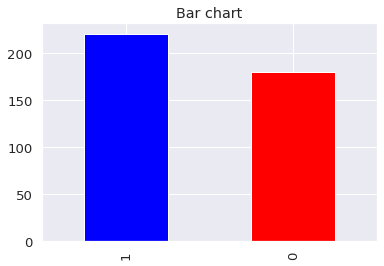

In [ ]:
sentimen_data=pd.value_counts(final_data["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["blue", "red"])
plt.title('Bar chart')
plt.show()

In [ ]:
bibit_finish = pd.read_csv('bibit_clean.csv')

data_label = bibit_finish[["content_stemmed", "label"]]

data_label.to_excel("data_label.xlsx")

In [ ]:
train_s0 = data_label[data_label["label"] == 0]

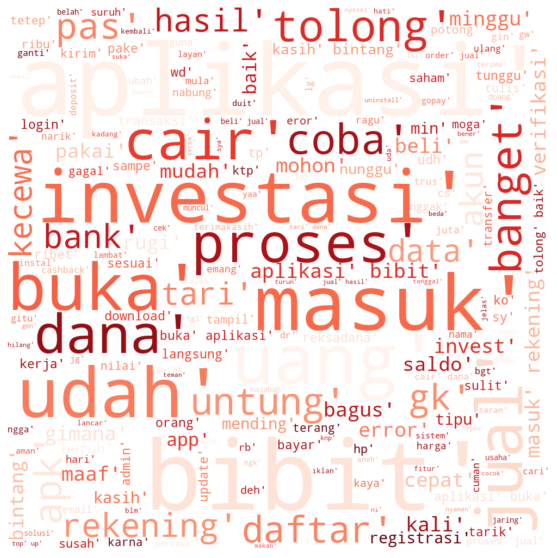

In [ ]:
from wordcloud import WordCloud

all_text_s0 = ' '.join(word for word in train_s0["content_stemmed"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = data_label[data_label["label"] == 1]

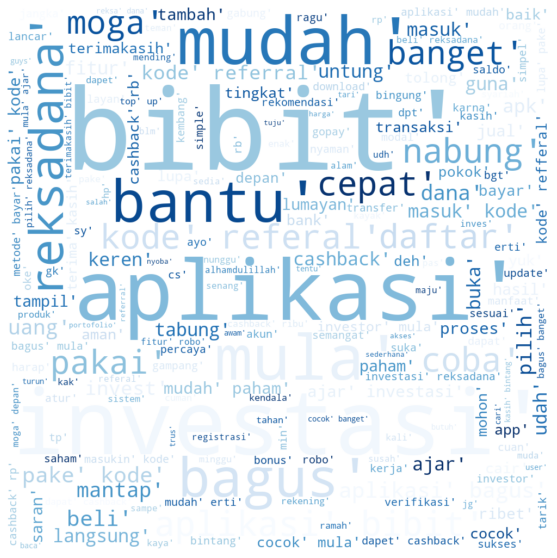

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["content_stemmed"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

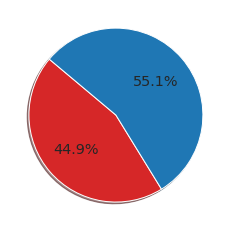

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('prediksi.csv')

pie = df.groupby('label').size()

colors = ["#d62728", "#1f77b4"]  
plt.pie(pie, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


In [ ]:
df_hasil = pd.read_csv('bibit_clean.csv')

df_hasil[['clean_content', 'score', 'label']].head(400)

,clean_content,score,label
0,yth bibit senin tanggal maret jam wib nama cec...,5,1
1,aplikasi tarik bangett nominal minimal tabung ...,5,1
2,investasi jangka ujung ujung pas cair belit be...,5,1
3,refferal sukses beda negara maju negara kemban...,5,1
4,bingung investasi banget liat iklan youtube ng...,5,1
...,...,...,...
395,alahamdullillah suka banget ama aplikasi fitur...,5,1
396,aplikasi bagus cs ngga tanggap,1,0
397,ayo pake kode refferall cashback zhrwjy samasa...,5,1
398,proses uang pindah tahan atur tahap cair pinda...,3,0


In [ ]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 24.5 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

In [ ]:
dataset = pd.read_csv('bibit_clean.csv')

dataset[['clean_content', 'label']]

,clean_content,label
0,yth bibit senin tanggal maret jam wib nama cec...,1
1,aplikasi tarik bangett nominal minimal tabung ...,1
2,investasi jangka ujung ujung pas cair belit be...,1
3,refferal sukses beda negara maju negara kemban...,1
4,bingung investasi banget liat iklan youtube ng...,1
...,...,...
1995,yuku ajar investasi kode referral nabungrutinu...,1
1996,min gmn narik blm masuk bursa udh minggu gk masuk,0
1997,gatau hp saga emng bibit lg pulih jls gtu loo ...,0
1998,bibit bantu rencana uang kode referral temanpe...,1


In [ ]:
data_prediksi = X_test



In [ ]:
df3 = pd.read_csv('hasil_prediksi.csv')

In [ ]:
import pandas as pd

df4 = pd.read_excel('hasil_prediksi_done.xlsx')



In [ ]:
df4

,data_prediksi,Hasil
0,"['bibitid', 'itikad', 'baik', 'sekaliuang', 't...",0
1,"['apl', 'bibit', 'dpat', 'buka']",1
2,"['mantep', 'rem', 'investasi', 'mula']",1
3,"['alam', 'puas', 'banget', 'syarat', 'daftar',...",1
4,"['bantu', 'capai', 'target', 'tuju', 'dlm', 'a...",1
...,...,...
395,"['bagus', 'mula', 'kaya', 'ajar', 'tabung', 'u...",1
396,"['coba', 'mula', 'rp', 'pingin', 'hasil', 'ins...",1
397,"['kapok', 'investasi', 'udah', 'modal', 'jt', ...",0
398,"['aplikasi', 'buka', 'terang', 'errnamenotreso...",0
